In [35]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import re

sns.set_theme(
    context="notebook",
    style="ticks",
    font_scale=1.8,
    rc={"figure.dpi": 300, "figure.constrained_layout.use": True, "lines.linewidth": 3},
)

results_path = Path.cwd().parent.resolve()/ "benchmarks" / "results"

os.makedirs("plots/threshold_cmp", exist_ok=True)

explainers = [
    "xtg-old",
    "xtg",
    "xtg-dot"
]
labels = {
    'xtg-old': 'PGNavigator',
    'xtg': 'MLPNavigator',
    'xtg-dot': 'DotProductNavigator'
}
dataset_to_index = {
    "simulate_v1": "Synthetic V1",
    "simulate_v2": "Synthetic V2"
}
markers = {
    "xtg-old": "s",
    "attn": "o",
    "pbone": "^",
    "pg": "X",
    "xtg-dot": "P",
    "xtg": "X",
}

In [36]:
# AUFSC plotting function
def plot_aufsc(model_name, dataset, explainer_name):
    # plot the AUFSC curves for simulate_v1 data, evaluated on PGNavigator model
    files = list(results_path.glob(
        f"{model_name}*{dataset}*eval*{explainer_name}_true*"))
    files = sorted(files, key=lambda x: int(re.search('.*_th([0-9]+)', str(x)).group(1)))
    labels = {
        re.search('.*_th([0-9]+)', str(exp)).group(1): exp
        for exp in files
    }

    tabs = {
        k: pd.read_csv(v).groupby("sparsity").mean()
        for k, v in labels.items()
    }
    
    for i, (k, tab) in enumerate(tabs.items()):
        print(
            f"{k}\t FID: {tab['fid_inv_best'].mean()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
        )
        plt.plot(tab.index, tab["fid_inv_best"], label=f'threshold ${k}$', marker=list(markers.values())[i])
    plt.legend()
    plt.savefig(f"plots/threshold_cmp/{model_name}_{dataset}_thresholds.png")

5	 FID: -0.6924170149919808 	 AUC: -0.6011394318412332
10	 FID: 0.10385597698272224 	 AUC: 0.2740724280914839
20	 FID: 0.7250281913496421 	 AUC: 0.8424836973057074
25	 FID: 0.6780670465263221 	 AUC: 0.7933148551951438


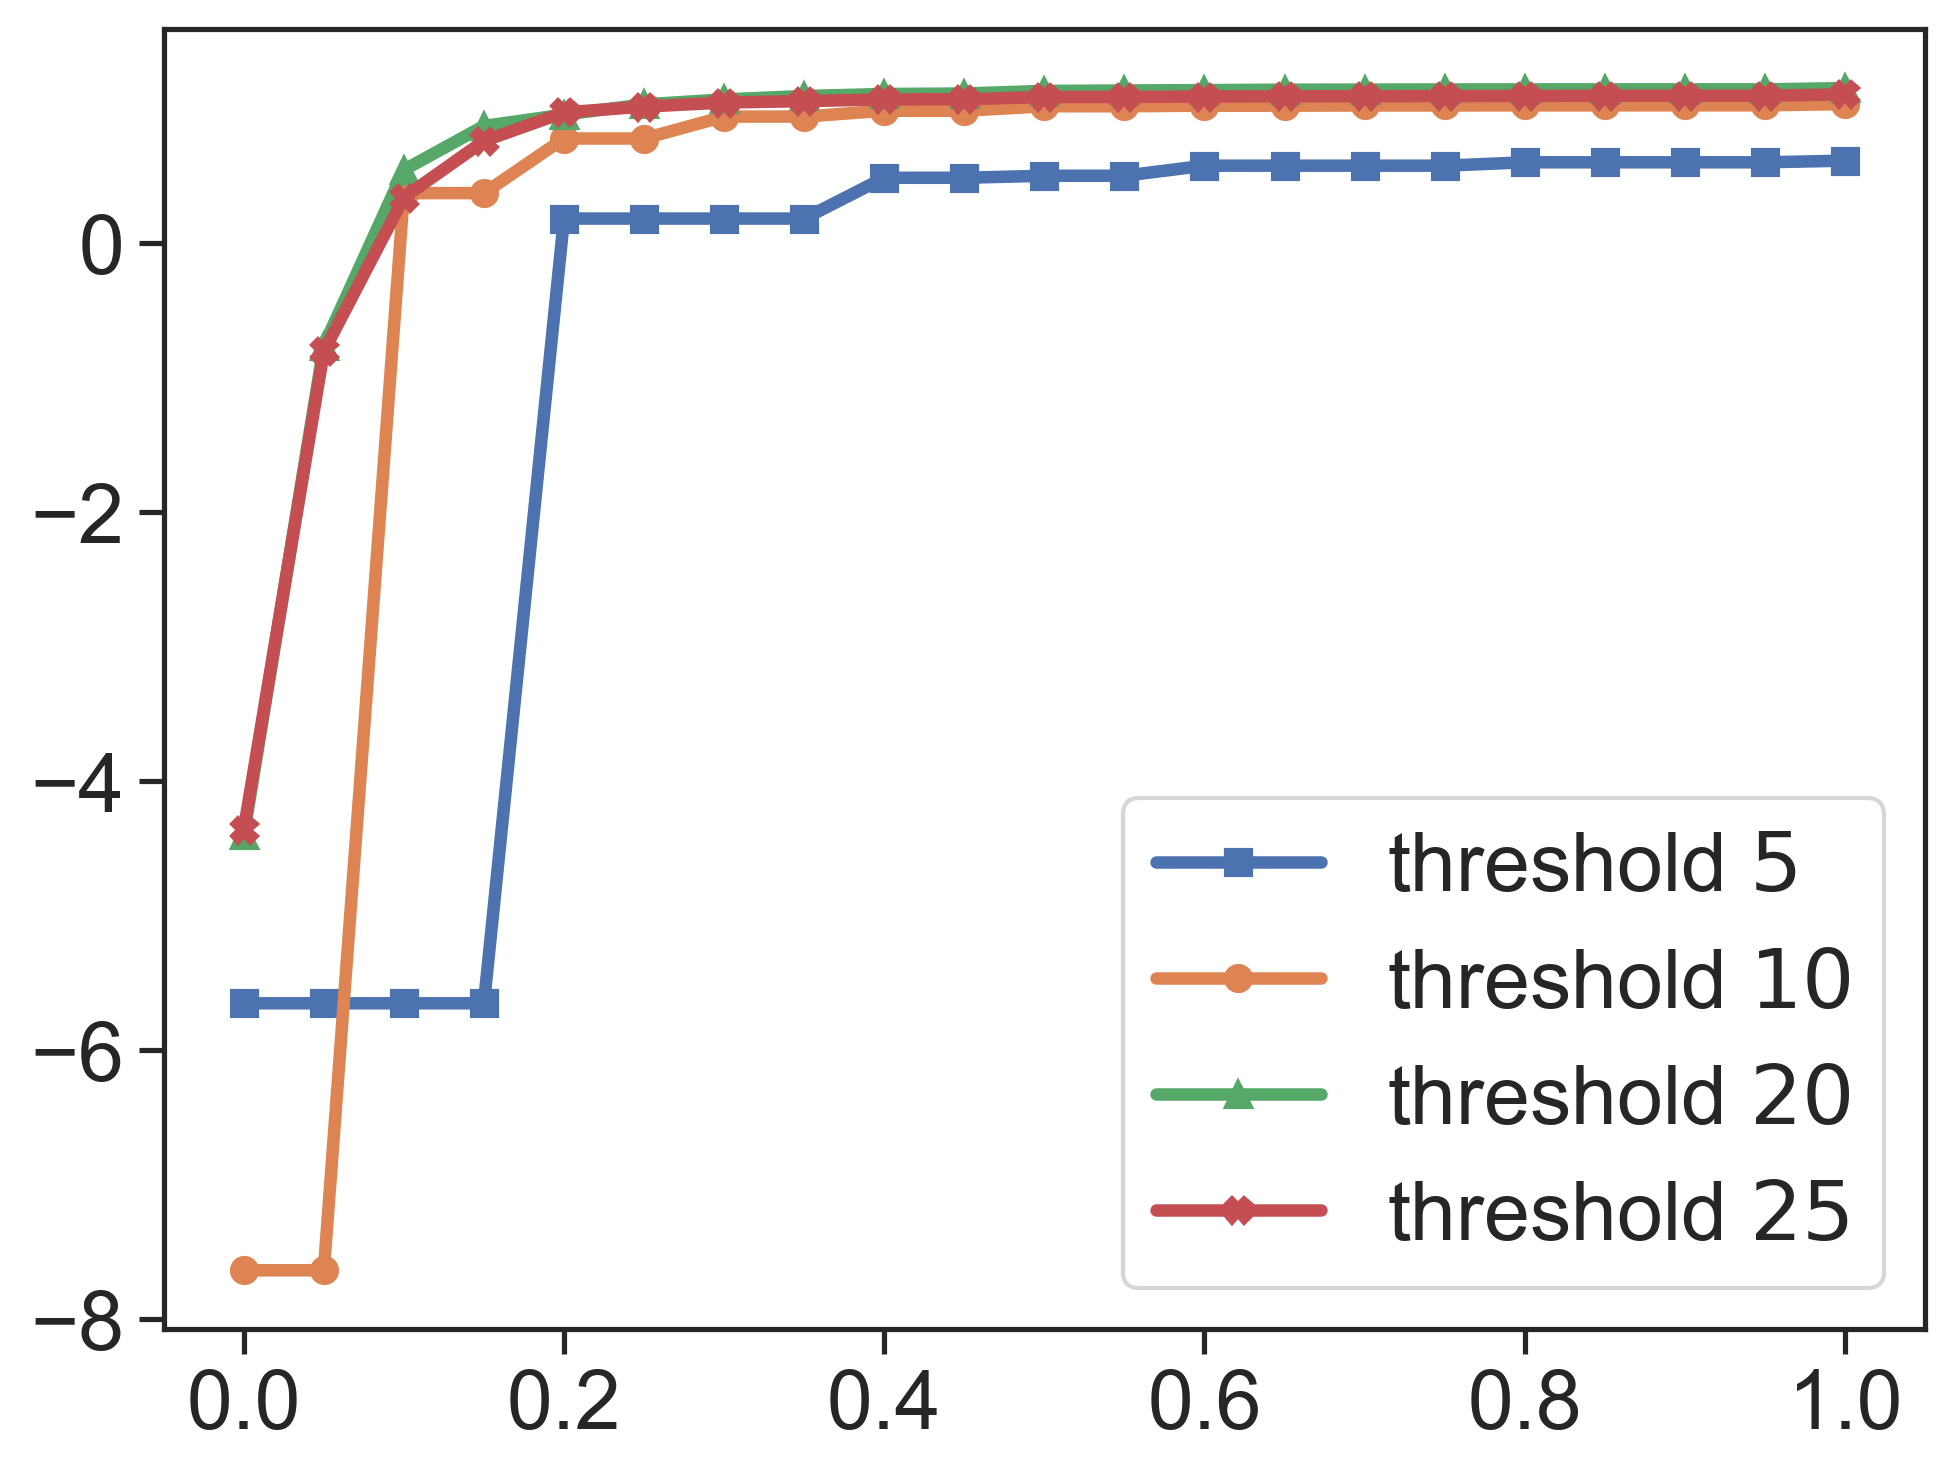

5	 FID: 0.24840854713562827 	 AUC: 0.2605975559017822
10	 FID: 0.4109742878184043 	 AUC: 0.4330835035910794
20	 FID: 0.691197437937715 	 AUC: 0.7195822088029601
25	 FID: 0.6858123564565716 	 AUC: 0.7120196774620198


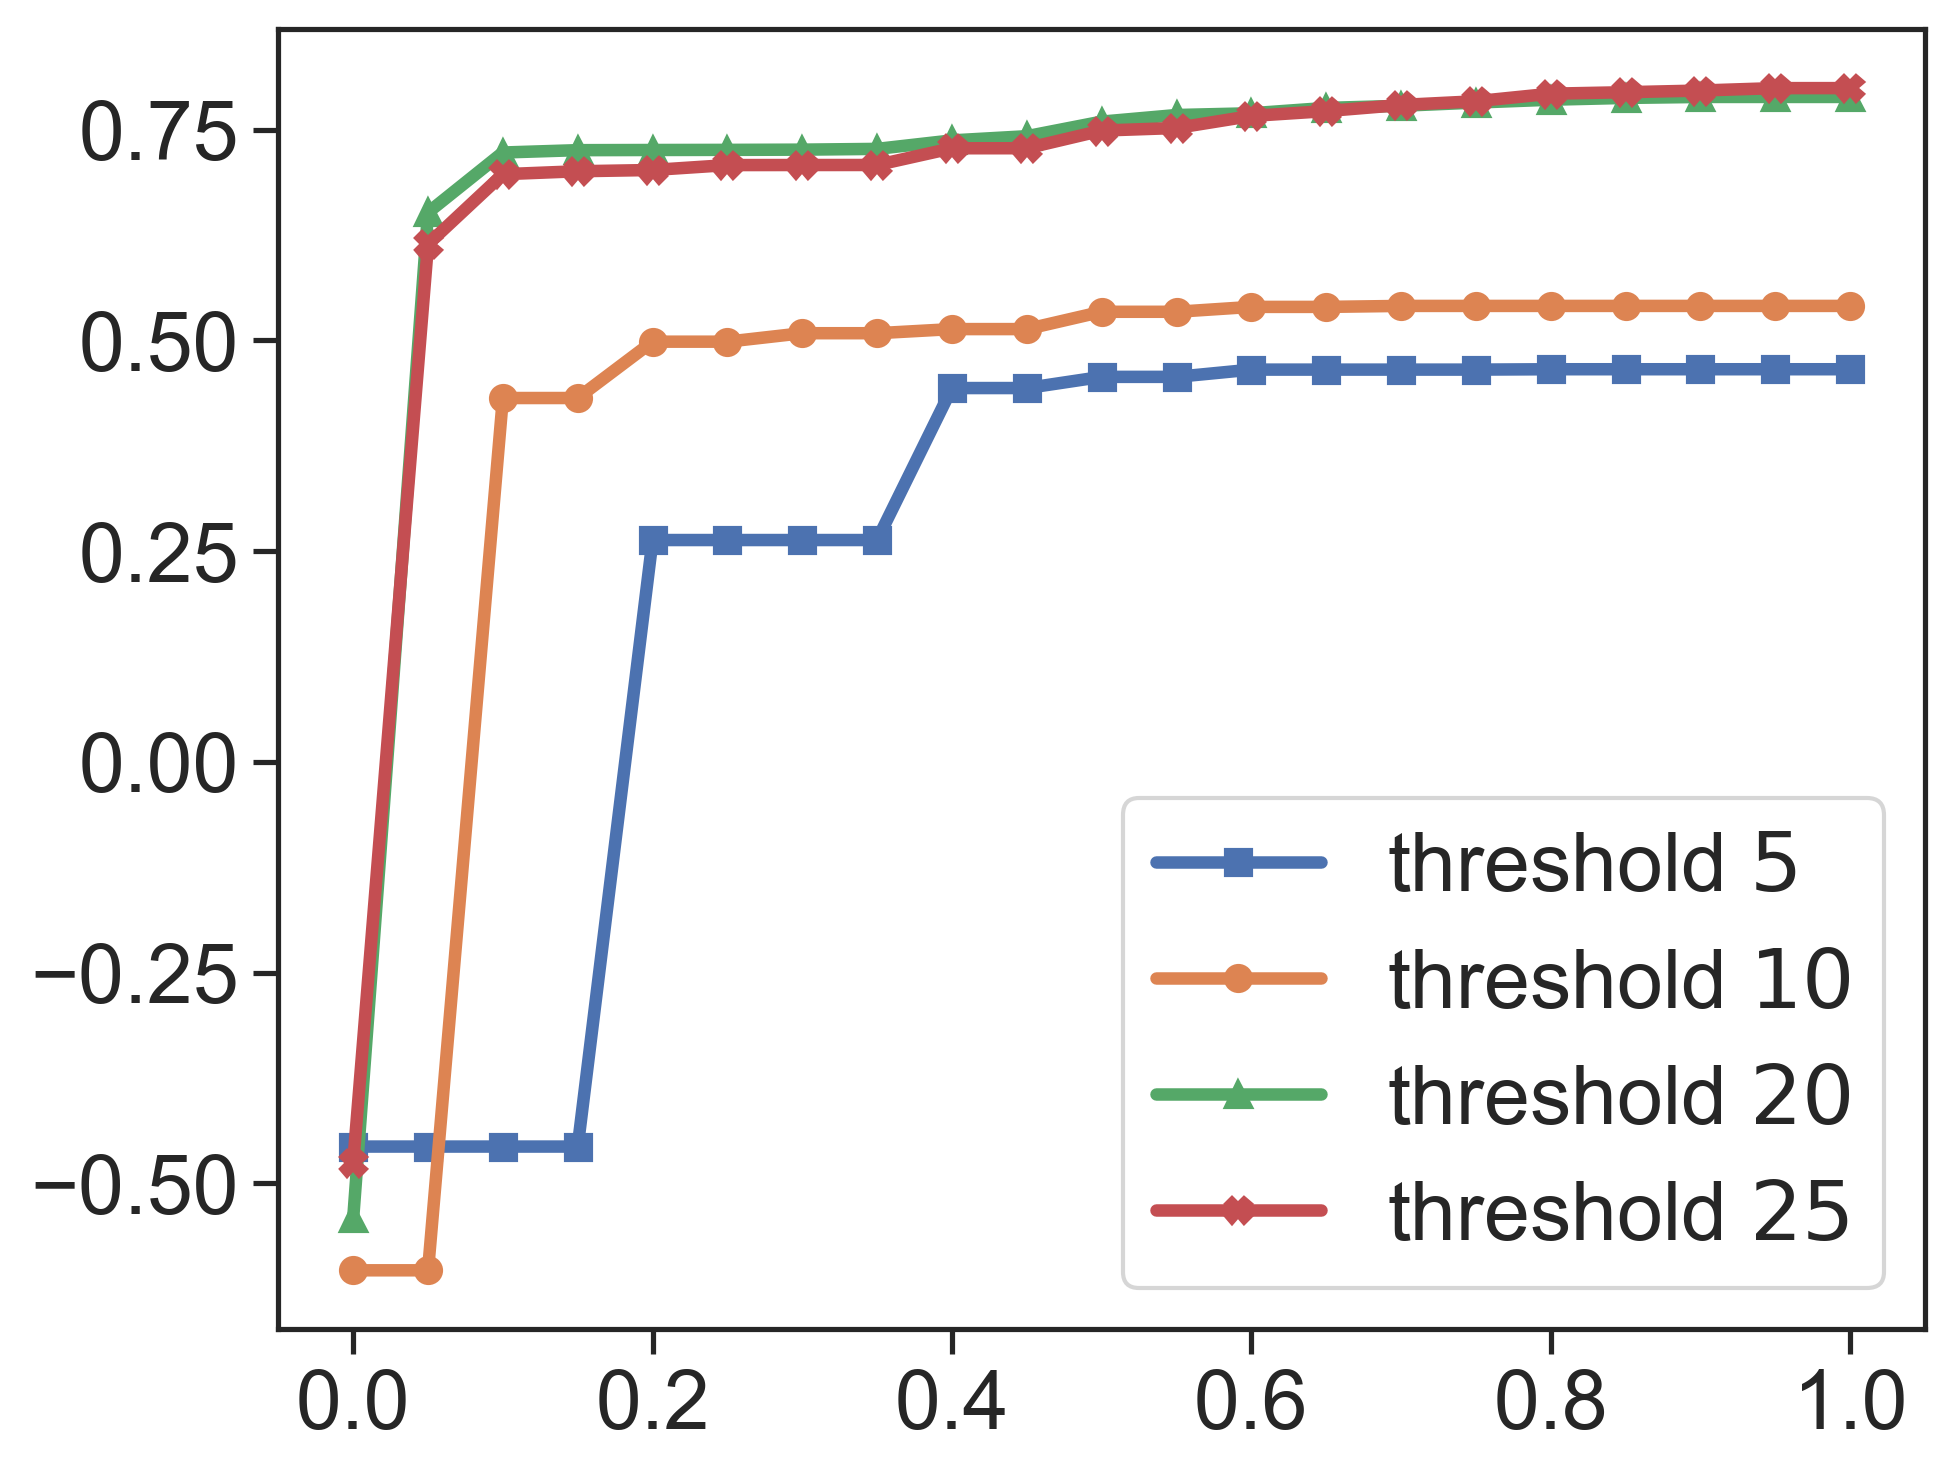

5	 FID: -0.7389769815151985 	 AUC: -0.6598513325055441
10	 FID: 0.06167550781527828 	 AUC: 0.20194772192660487
20	 FID: 1.3568068104687412 	 AUC: 1.4673305029670394
25	 FID: 1.3360585382227357 	 AUC: 1.445104979475339


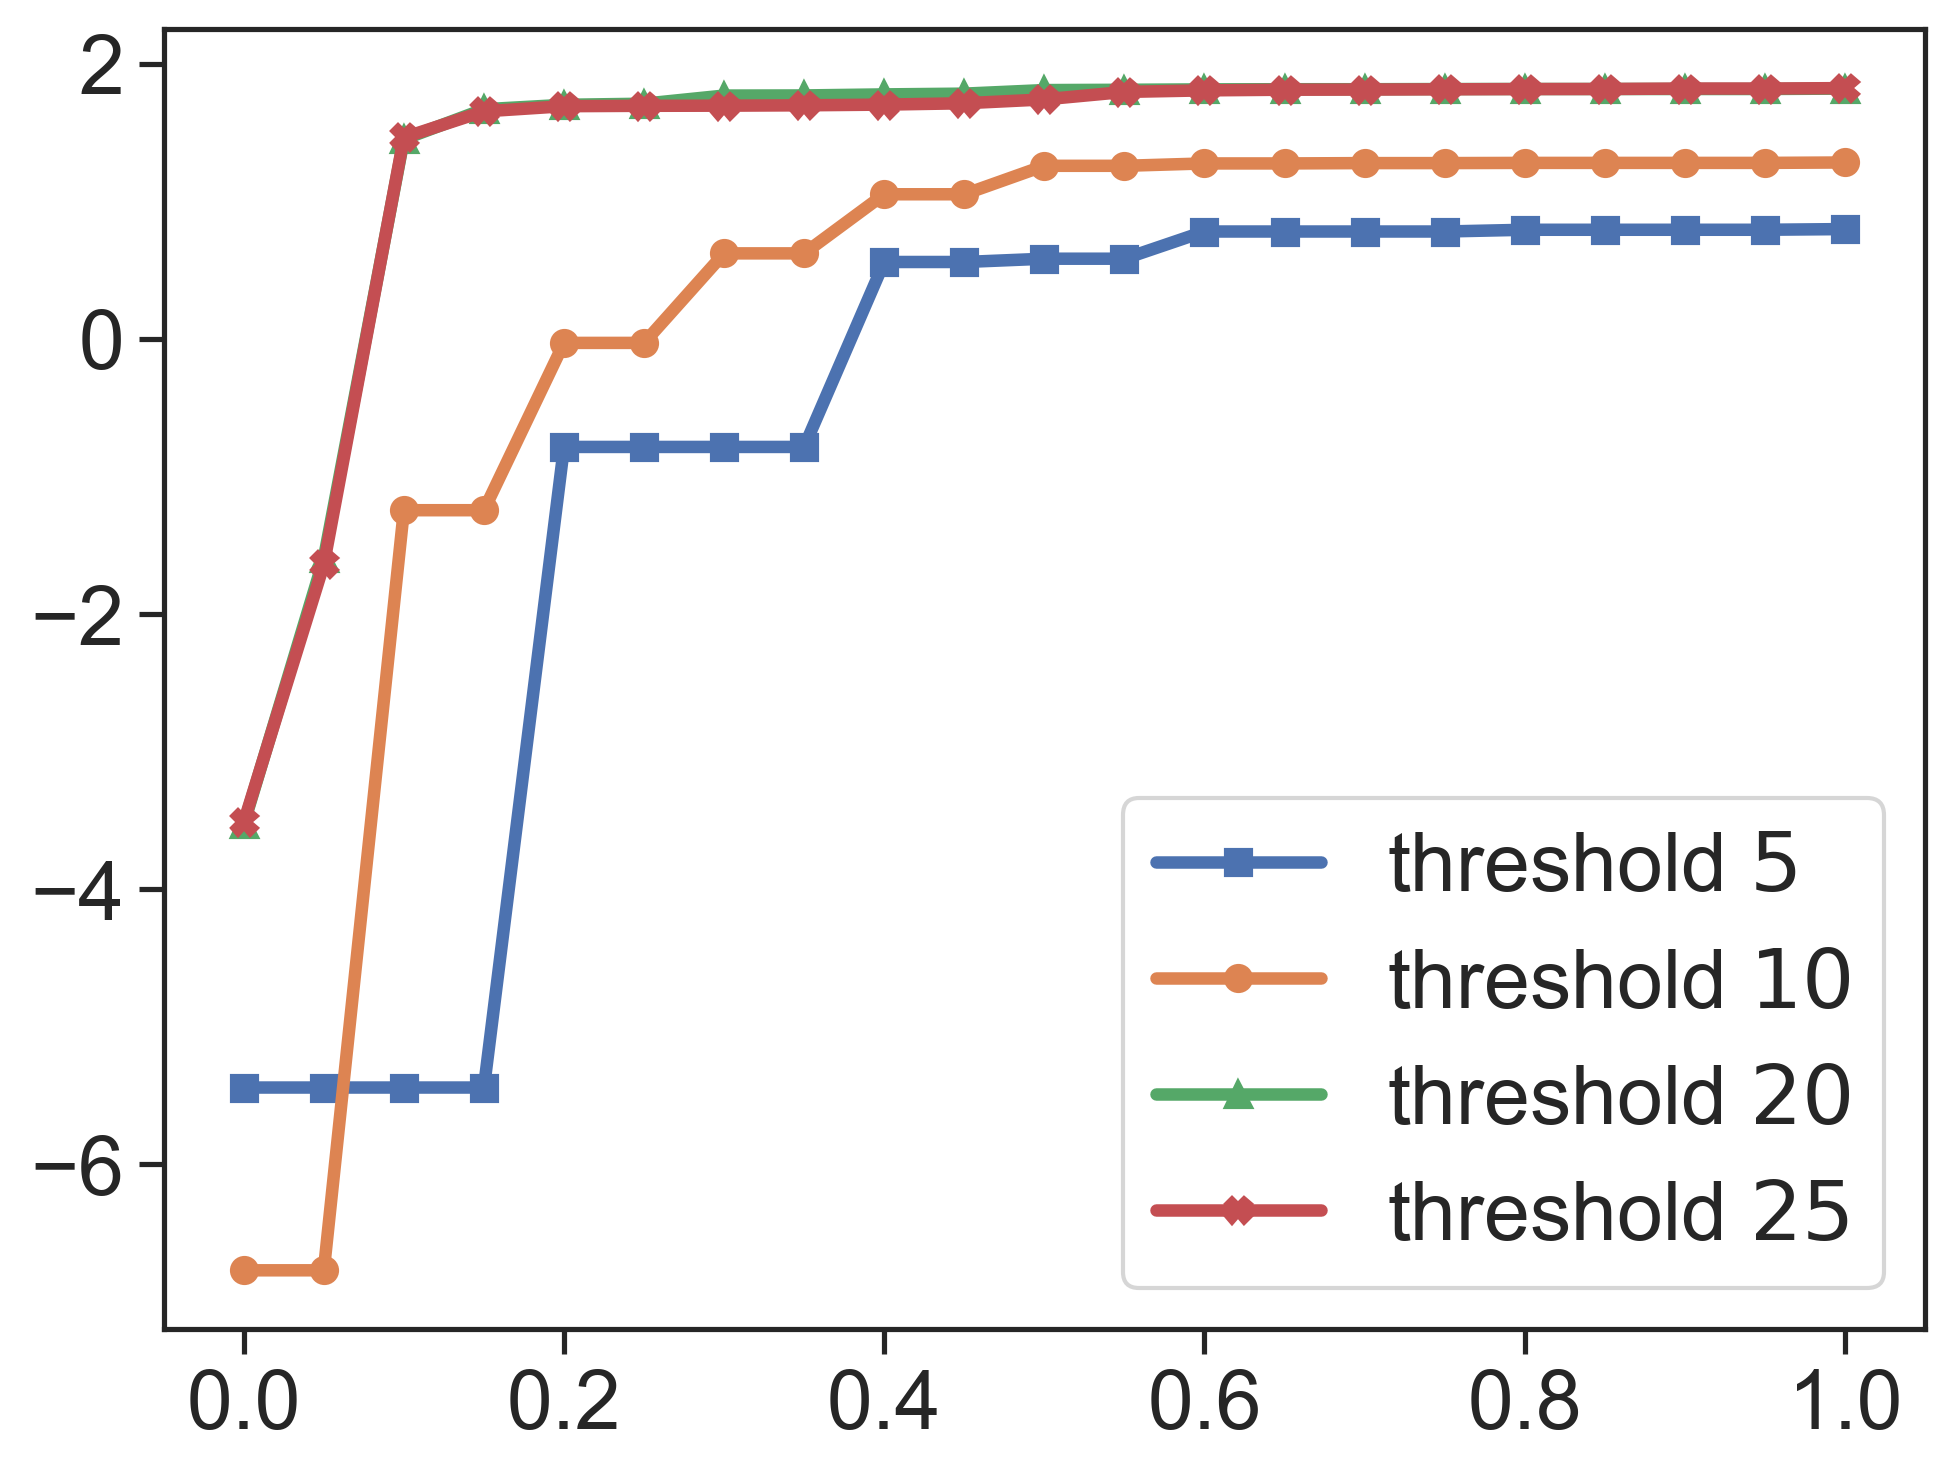

5	 FID: -0.9735070787140634 	 AUC: -0.8680396070229074
10	 FID: 0.16331680066167023 	 AUC: 0.3280703331033388
20	 FID: 1.5359569279377867 	 AUC: 1.7695163844043715
25	 FID: 1.7088345840197652 	 AUC: 1.9164757087023234


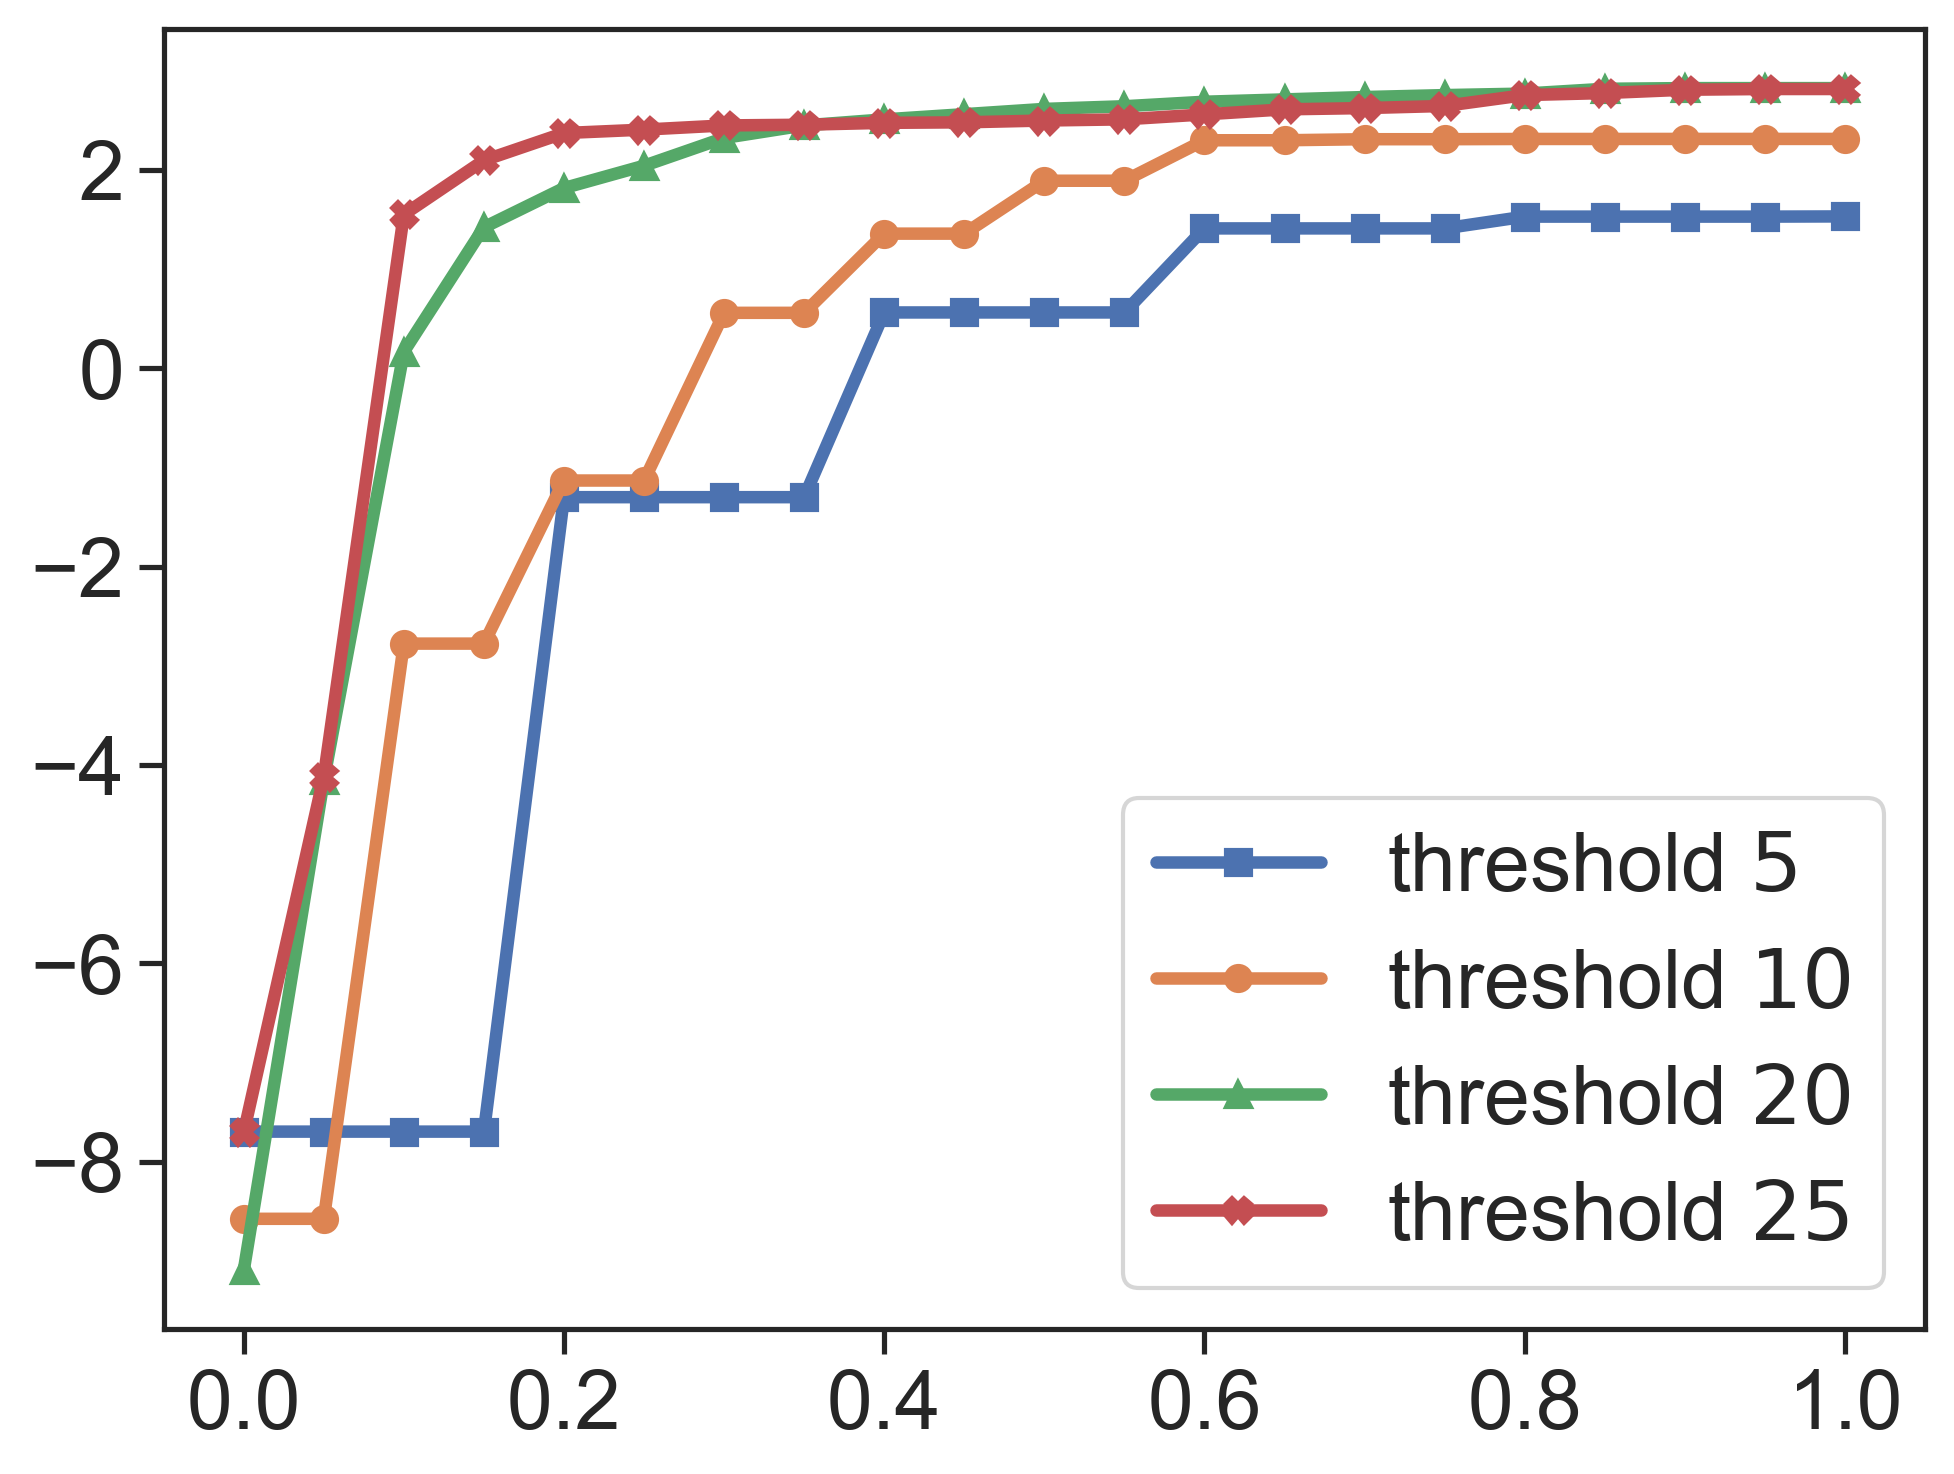

In [37]:
plot_aufsc("tgat", "simulate_v1", "pg")
plt.show()
plot_aufsc("tgat", "simulate_v2", "pg")
plt.show()
plot_aufsc("tgn", "simulate_v1", "pg")
plt.show()
plot_aufsc("tgn", "simulate_v2", "pg")
plt.show()